# Profile Investigations

In [263]:
from scipy.stats import gamma, exponweib
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time

In [264]:
R0 = 1.5
#Distribution parameters taken from ashcroft paper
shape = 97.18750
scale = 1/ 3.71875
shift = -25.62500


rescale = 1 / (1 - gamma.cdf(-10, shape,shift, scale))


#scale the distn parameters for the testing positivity profile
#increase the variance and keep mean the same
test_scale = scale*(1/0.6)
test_shape = shape*0.6

b=2
a=3

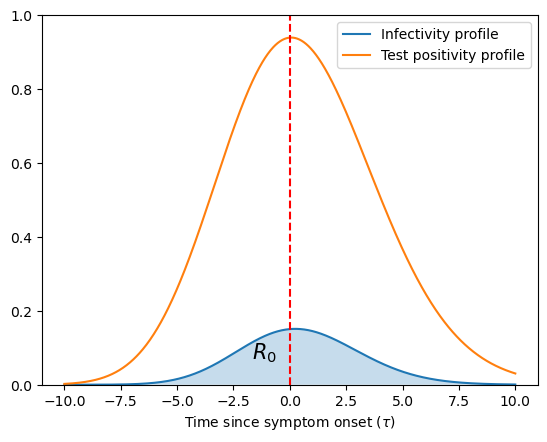

In [265]:
x = np.linspace(-10,10,1001)
y = [rescale * gamma.pdf(i, shape,shift, scale) for i in x]
y2 = [8*gamma.pdf(i, test_shape,shift, test_scale) for i in x]
plt.plot(x,y,label = "Infectivity profile")
plt.plot(x,y2, label = "Test positivity profile")
plt.fill_between(x,y,alpha = 0.25)
plt.vlines(0,0,1,linestyle = "--", color = "r")
plt.ylim(0,1)
plt.xlabel("Time since symptom onset ("+ r'$\tau$' + ")")
plt.text(-1.7,0.07,r'$R_0$',fontsize = 15)
plt.legend()


# Weibull vs Gamma speed test

In [266]:
N = int(1e6)
T1 = np.random.uniform(0,1,N)
T2 = np.random.uniform(0,1,N)

start = time.time()
for i in tqdm(range(N)):
    np.exp(-((T1[i])/b)**a)-np.exp(-((T2[i])/b)**a)
end = time.time()
t_w = end-start
print("Time elapsed to calculate Weibull CDF ", N, " times:",end-start)

start = time.time()
for i in tqdm(range(N)):
     (1-np.exp(-((T2[i]-params[2])/params[3])**params[1]))**params[0] - (1-np.exp(-((T1[i]-params[2])/params[3])**params[1]))**params[0]
end = time.time()
t_ew = end-start
print("Time elapsed to calculate Exponentiated Weibull CDF", N, " times:",end-start)


start = time.time()
for i in tqdm(range(N)):
    gamma.cdf(T2[i]-10,shape,shift,scale) - gamma.cdf(T1[i]-10,shape,shift,scale)
end = time.time()
t_g = end-start
print("Time elapsed to calculate Gamma CDF", N, " times:",end-start)

print("Weibull is", t_g/t_w, " times faster than gamma.")
print("Exponentiated Weibull is", t_g/t_ew, " times faster than gamma.")

100%|██████████| 1000000/1000000 [00:04<00:00, 232158.74it/s]


Time elapsed to calculate Weibull CDF  1000000  times: 4.3073976039886475


100%|██████████| 1000000/1000000 [00:04<00:00, 202380.19it/s]


Time elapsed to calculate Exponentiated Weibull CDF 1000000  times: 4.944756507873535


100%|██████████| 1000000/1000000 [03:56<00:00, 4222.02it/s]

Time elapsed to calculate Gamma CDF 1000000  times: 236.8550832271576
Weibull is 54.98797766146082  times faster than gamma.
Exponentiated Weibull is 47.900252085216586  times faster than gamma.


# Fitting Exponentiated Weibull to the gamma distribution

In [267]:
data = gamma.rvs(shape,shift, scale, size=10000000)

In [268]:
#params = exponweib.fit(data)

In [269]:
weib_params_inf = [2.5573538434277925, 2.9506811454264685, -10.822291419176842, 9.946517003145942]
weib_params_test = [2.5573538434277925/2, 2.9506811454264685, -10.822291419176842, 9.946517003145942*1.15]

In [270]:
print(exponweib.mean(weib_params_inf[0], weib_params_inf[1], weib_params_inf[2],  weib_params_inf[3]))
print(exponweib.var(weib_params_inf[0], weib_params_inf[1], weib_params_inf[2],  weib_params_inf[3]))

0.5030694318434445
6.975691021380009


In [271]:
print(exponweib.mean(weib_params_test[0], weib_params_test[1], weib_params_test[2],  weib_params_test[3]))
print(exponweib.var(weib_params_test[0], weib_params_test[1], weib_params_test[2],  weib_params_test[3]))

0.17888702779519328
12.746966944020405


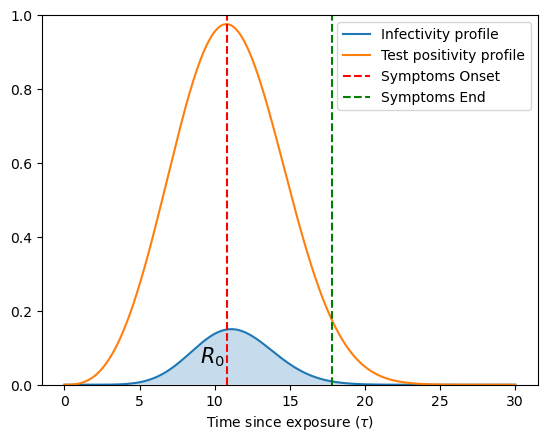

In [275]:
x = np.linspace(0,30,1001)
y3 = [exponweib.pdf(i,weib_params_inf[0], weib_params_inf[1], 0*weib_params_inf[2],  weib_params_inf[3]) for i in x]
y4 = [9*exponweib.pdf(i,weib_params_test[0], weib_params_test[1], 0*weib_params_test[2],  weib_params_test[3]) for i in x]

plt.plot(x,y3,label = "Infectivity profile")
plt.plot(x,y4, label = "Test positivity profile")
plt.fill_between(x,y3,alpha = 0.25)
plt.vlines(-weib_params_test[2],0,1,linestyle = "--", color = "r",label = "Symptoms Onset")
plt.vlines(-weib_params_test[2]+7,0,1,linestyle = "--", color = "g",label = "Symptoms End")
plt.ylim(0,1)
plt.xlabel("Time since exposure ("+ r'$\tau$' + ")")
plt.text(9,0.06,r'$R_0$',fontsize = 15)
plt.legend()






In [273]:
N = int(1e6)
T1 = np.linspace(0,30,N)
test_pdf = lambda T: weib_params_test[1]*((1-np.exp(-(T/weib_params_test[3])**weib_params_test[1]))**(weib_params_test[0]-1))*np.exp(-(T/weib_params_test[3])**weib_params_test[1])*(T/weib_params_test[3])**(weib_params_test[1]-1) if T>0 else 0

start = time.time()
for i in tqdm(range(N)):
    test_pdf(T1[i])
end = time.time()
t_m = end-start
print("Time elapsed to calculate pdf with my func ", N, " times:",end-start)


start = time.time()
for i in tqdm(range(N)):
    exponweib.pdf(i,2.5573538434277925/2, 2.9506811454264685, 0, 9.946517003145942*1.15)
end = time.time()
t_ib = end-start
print("Time elapsed to calculate pdf with inbuilt func", N, " times:",end-start)

print("My func is", t_ib/t_m, " times faster than the inbuilt func.")


100%|██████████| 1000000/1000000 [00:05<00:00, 197174.22it/s]


Time elapsed to calculate pdf with my func  1000000  times: 5.0746800899505615


100%|██████████| 1000000/1000000 [02:33<00:00, 6502.03it/s]

Time elapsed to calculate pdf with inbuilt func 1000000  times: 153.7990174293518
My func is 30.30713556385978  times faster than the inbuilt func.
